<a href="https://colab.research.google.com/github/joshuajonme/twitter-sentiment-analysis/blob/main/TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving twitterAPI.csv to twitterAPI.csv


In [4]:
log = pd.read_csv('twitterAPI.csv')

In [5]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [111]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="saamcactus", count = 200, lang = 'en', tweet_mode = 'extended', include_rts = False)

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i += 1

AttributeError: ignored

In [104]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],  columns = ['Tweets'])

# Show the first 5 rows of data
df

,Tweets
0,taurus shit😜💅 @JoshieCoronel https://t.co/6wMs...
1,my spirit guides rly said bitch u wanted to stop.
2,ever since i started therapy and made the cons...
3,"i’m here, i’m queer, i’m an engineer"
4,@ameruu i’m grateful for my group of friends &...
5,You can make incredible progress when it comes...
6,kept a bath and body works perfume in my car a...
7,"need to get “ITS OK, NOTHING BAD HAPPENED” tat..."
8,every time the audio fades out on something i’...
9,You run the risk of being perceived as being i...


In [93]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
  text = re.sub(r'#', '', text) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hypterlink

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,taurus shit😜💅
1,my spirit guides rly said bitch u wanted to stop.
2,ever since i started therapy and made the cons...
3,"i’m here, i’m queer, i’m an engineer"
4,i’m grateful for my group of friends &amp; ou...
5,You can make incredible progress when it comes...
6,kept a bath and body works perfume in my car a...
7,"need to get “ITS OK, NOTHING BAD HAPPENED” tat..."
8,every time the audio fades out on something i’...
9,You run the risk of being perceived as being i...


In [94]:
# Create a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,taurus shit😜💅,0.000000,0.000000
1,my spirit guides rly said bitch u wanted to stop.,0.000000,0.000000
2,ever since i started therapy and made the cons...,0.566667,0.250000
3,"i’m here, i’m queer, i’m an engineer",0.000000,0.000000
4,i’m grateful for my group of friends &amp; ou...,0.000000,0.000000
5,You can make incredible progress when it comes...,0.700000,0.700000
6,kept a bath and body works perfume in my car a...,0.000000,0.000000
7,"need to get “ITS OK, NOTHING BAD HAPPENED” tat...",0.583333,-0.100000
8,every time the audio fades out on something i’...,0.000000,0.000000
9,You run the risk of being perceived as being i...,0.500000,0.500000


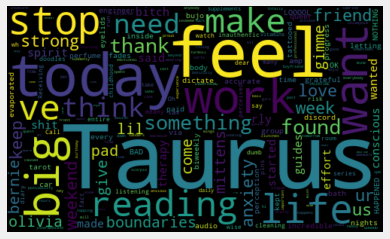

In [95]:
# Plot Word Cloud
allWords = ' '.join([tweet for tweet in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [96]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,taurus shit😜💅,0.000000,0.000000,Neutral
1,my spirit guides rly said bitch u wanted to stop.,0.000000,0.000000,Neutral
2,ever since i started therapy and made the cons...,0.566667,0.250000,Positive
3,"i’m here, i’m queer, i’m an engineer",0.000000,0.000000,Neutral
4,i’m grateful for my group of friends &amp; ou...,0.000000,0.000000,Neutral
5,You can make incredible progress when it comes...,0.700000,0.700000,Positive
6,kept a bath and body works perfume in my car a...,0.000000,0.000000,Neutral
7,"need to get “ITS OK, NOTHING BAD HAPPENED” tat...",0.583333,-0.100000,Negative
8,every time the audio fades out on something i’...,0.000000,0.000000,Neutral
9,You run the risk of being perceived as being i...,0.500000,0.500000,Positive


In [97]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) ever since i started therapy and made the conscious effort to stop letting tarot readings dictate my perception of my life, no reading i’ve paid for has been accurate LOOOOL

2) You can make incredible progress when it comes to your work an... More for Taurus 

3) You run the risk of being perceived as being inauthentic if wh... More for Taurus 

4) You'd be wise to watch what you say today. In fact, you should... More for Taurus 

5) how many supplements/vitamins do u take daily

6) There's a strong possibility you will feel out of sorts today;... More for Taurus 

7) hi everybody! a good friend of mine is a single bachelor looking for love, and is totally not a scorpio. hit him up! ⁦⁩  

8) It's important to keep your eye on the ball today, but that mi... More for Taurus 

9) You could make a major mark on the professional front today, s... More for Taurus 

10) is there a not awkward way to be like hey girl you’re so pretty and i know the same man caused us emotional turmoil but 

In [98]:
# Print the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending='False')
for i in range(sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) need to get “ITS OK, NOTHING BAD HAPPENED” tattooed on the inside of my eyelids

2) cleaning my room and found the entire series of dear dumb diary and meany doodles pins. thank u for my childhood 

3) like sometimes u think ur anxious and then suddenly something even worse happens and ur like wow last week was just intermediate anxiety

4) it is my boyfriend’s birthday weekend and we have spent the past five hours napping. he is a taurus rising

5) i’d be insecure about sabrina carpenter too damn i feel u on this one olivia

6) after the week i’ve had i’m starting to feel like a pad with no wings on a heavy flow is basically the same experience is not wearing a pad at all

7) i loveeee VALENTINE’S DAY! PINK EVERYTHING! gimme gimme

8) colourpop’s monochromatic palettes r so lazy to me give me a COLOR STORY give me DIVERSITY



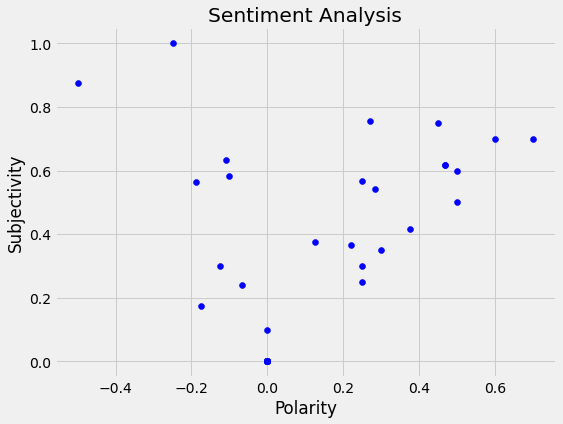

In [99]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [100]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(ptweets.shape[0] / df.shape[0] * 100, 1)

41.0

In [101]:
# Get the percentage of positive tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(ntweets.shape[0] / df.shape[0] * 100, 1)

20.5

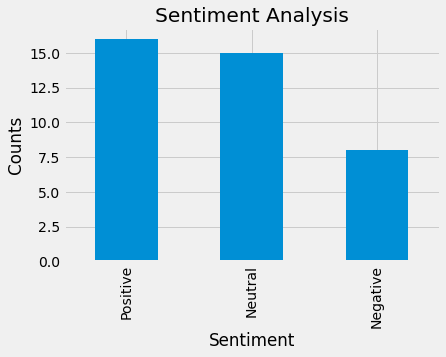

In [102]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()